## **Dataset Characteristics 4 Additional Features**

In this Jupyter notebook, we investigate additional features which might be worth being implemented.

These features are

1. *Ferientage*
2. *Niederschlag*
3. *Season*





### **1.0 - Import the file**

In [14]:
# Import the necessary libaries
import csv
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
import missingno as msno
import seaborn as sns

# Read the file and check it out
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/5_has_wettercode.csv'

# Read the file and check it out
df = pd.read_csv(url)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009 entries, 0 to 7008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                7009 non-null   object 
 1   Bewoelkung           7009 non-null   float64
 2   Temperatur           7009 non-null   float64
 3   Windgeschwindigkeit  7009 non-null   float64
 4   Wettercode           7009 non-null   float64
 5   KielerWoche          7009 non-null   float64
 6   Warengruppe          7009 non-null   float64
 7   Umsatz               7009 non-null   float64
 8   Feiertage            7009 non-null   float64
 9   Ferientage           7009 non-null   float64
dtypes: float64(9), object(1)
memory usage: 547.7+ KB


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Warengruppe,Umsatz,Feiertage,Ferientage
0,2013-07-01,6.0,17.8375,15.0,20.0,0.0,1.0,148.828353,0.0,1.0
1,2013-07-01,6.0,17.8375,15.0,20.0,0.0,2.0,535.856285,0.0,1.0
2,2013-07-01,6.0,17.8375,15.0,20.0,0.0,3.0,201.198426,0.0,1.0
3,2013-07-01,6.0,17.8375,15.0,20.0,0.0,4.0,65.890169,0.0,1.0
4,2013-07-01,6.0,17.8375,15.0,20.0,0.0,5.0,317.475875,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7004,2018-07-30,6.0,27.7875,10.0,21.0,0.0,1.0,148.541340,0.0,1.0
7005,2018-07-30,6.0,27.7875,10.0,21.0,0.0,2.0,616.358562,0.0,1.0
7006,2018-07-30,6.0,27.7875,10.0,21.0,0.0,3.0,348.770346,0.0,1.0
7007,2018-07-30,6.0,27.7875,10.0,21.0,0.0,4.0,71.822977,0.0,1.0


### **1.1 - Creation of a bar chart: representation of the correlation of average sales per weekday (sorted from Monday to Sunday inclusive) and adding the confidence intervals of sales per weekday (using standard deviation of sales per weekday)**

To analyse the dataset only for each 'Warengruppe', we uses a bar chart with confidence intervals to display the relationship between the  
average sales per day of the week. The days of the week in the chart are sorted from Monday to Sunday.

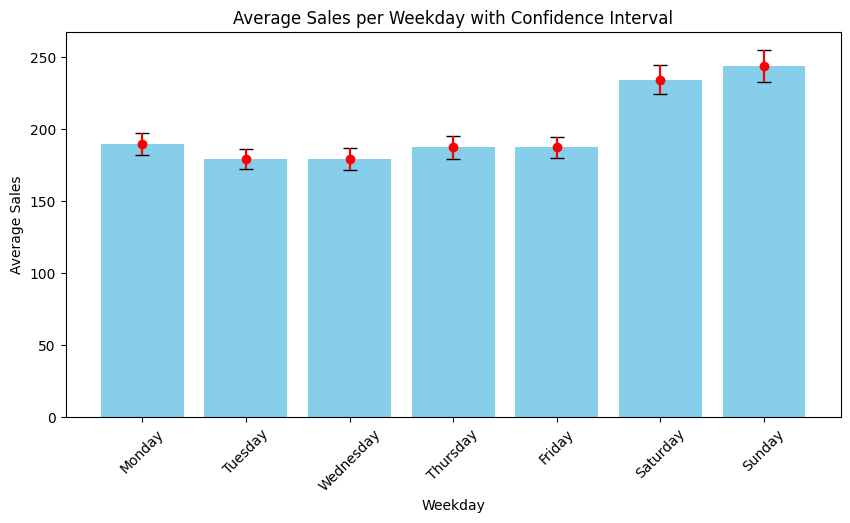

In [10]:
# Convert 'Datum' column to datetime format
df['Datum'] = pd.to_datetime(df['Datum'])

# Extract weekday from 'Datum' column
df['Weekday'] = df['Datum'].dt.weekday

# Calculate average sales per weekday
avg_sales_per_weekday = df.groupby('Weekday')['Umsatz'].mean()

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

# Calculate confidence interval
ci = 1.96 * df.groupby('Weekday')['Umsatz'].std() / np.sqrt(df.groupby('Weekday')['Umsatz'].count())

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday with Confidence Interval')
plt.show()
logging.info(avg_sales_per_weekday)

### **1.2 - Creation of a bar chart for feature "Ferientage"**

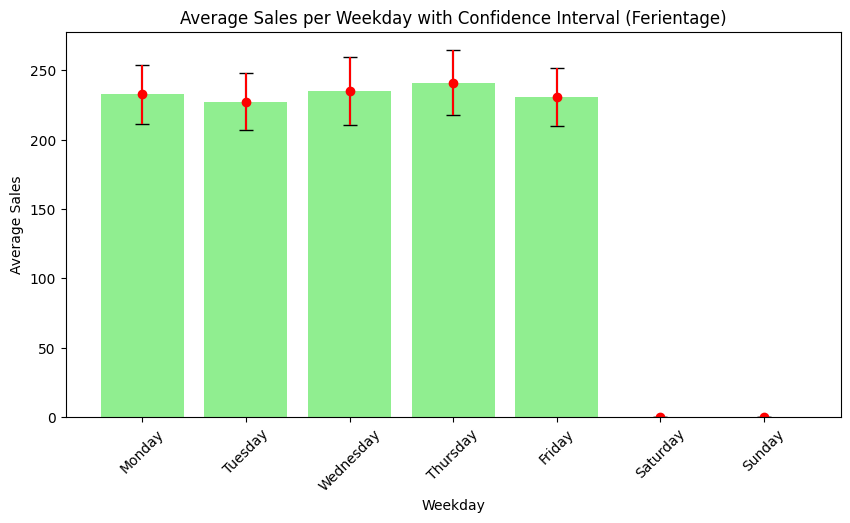

In [13]:
# Filtering data for 'Ferientage' period
df_ferientage = df[df['Ferientage'] == 1]

# Calculate average sales per weekday for 'Ferientage' period
avg_sales_per_weekday_ferientage = df_ferientage.groupby('Weekday')['Umsatz'].mean()

# Ensure all weekdays are present
avg_sales_per_weekday_ferientage = avg_sales_per_weekday_ferientage.reindex([0, 1, 2, 3, 4, 5, 6], fill_value=0)

# Calculate confidence interval for 'Ferientage' period
ci_ferientage = 1.96 * df_ferientage.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_ferientage.groupby('Weekday')['Umsatz'].count())

# Ensure all confidence intervals match the shape
ci_ferientage = ci_ferientage.reindex([0, 1, 2, 3, 4, 5, 6], fill_value=0)

# Plot bar chart for 'Ferientage' period
plt.figure(figsize=(10, 5))
plt.bar(avg_sales_per_weekday_ferientage.index, avg_sales_per_weekday_ferientage.values, yerr=ci_ferientage, capsize=5, color='lightgreen')
plt.errorbar(avg_sales_per_weekday_ferientage.index, avg_sales_per_weekday_ferientage.values, yerr=ci_ferientage, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday with Confidence Interval (Ferientage)')
plt.show()

### **2.0 - Import the file**

In [15]:
# Import the necessary libaries
import csv
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
import missingno as msno
import seaborn as sns

# Read the file and check it out
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'

# Read the file and check it out
df_weather = pd.read_csv(url)
df_weather.info()
df_weather

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Datum                    6999 non-null   object 
 1   Bewoelkung               6999 non-null   float64
 2   Temperatur               6999 non-null   float64
 3   Windgeschwindigkeit      6999 non-null   float64
 4   Wettercode               6999 non-null   float64
 5   KielerWoche              6999 non-null   float64
 6   Warengruppe              6999 non-null   float64
 7   Umsatz                   6999 non-null   float64
 8   Feiertage                6999 non-null   float64
 9   Ferientage               6999 non-null   float64
 10  Wetterklasse             6999 non-null   int64  
 11  Niederschlag             6999 non-null   float64
 12  year                     6999 non-null   int64  
 13  month                    6999 non-null   int64  
 14  week                    

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Warengruppe,Umsatz,Feiertage,Ferientage,...,month,week,weekday,day_month,season_str,season,temp_7d_avg,temp_diff_next_day,warmer_than_week_before,colder_than_week_before
0,2013-07-01,6.0,17.8375,15.0,20.0,0.0,1.0,148.828353,0.0,1.0,...,7,27,0,1,summer,2,18.762500,-0.925000,0.0000,0.925000
1,2013-07-01,6.0,17.8375,15.0,20.0,0.0,2.0,535.856285,0.0,1.0,...,7,27,0,1,summer,2,18.762500,-0.925000,0.0000,0.925000
2,2013-07-01,6.0,17.8375,15.0,20.0,0.0,3.0,201.198426,0.0,1.0,...,7,27,0,1,summer,2,18.762500,-0.925000,0.0000,0.925000
3,2013-07-01,6.0,17.8375,15.0,20.0,0.0,4.0,65.890169,0.0,1.0,...,7,27,0,1,summer,2,18.762500,-0.925000,0.0000,0.925000
4,2013-07-01,6.0,17.8375,15.0,20.0,0.0,5.0,317.475875,0.0,1.0,...,7,27,0,1,summer,2,18.762500,2.312500,2.3125,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,2018-07-30,6.0,27.7875,10.0,21.0,0.0,1.0,148.541340,0.0,1.0,...,7,31,0,30,summer,2,28.446429,-0.658929,0.0000,0.658929
6995,2018-07-30,6.0,27.7875,10.0,21.0,0.0,2.0,616.358562,0.0,1.0,...,7,31,0,30,summer,2,28.475000,-0.687500,0.0000,0.687500
6996,2018-07-30,6.0,27.7875,10.0,21.0,0.0,3.0,348.770346,0.0,1.0,...,7,31,0,30,summer,2,28.337500,-0.550000,0.0000,0.550000
6997,2018-07-30,6.0,27.7875,10.0,21.0,0.0,4.0,71.822977,0.0,1.0,...,7,31,0,30,summer,2,28.200000,-0.412500,0.0000,0.412500


### **2.1 - Creation of a bar chart for feature "Niederschlag"**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Datum                    6999 non-null   object 
 1   Bewoelkung               6999 non-null   float64
 2   Temperatur               6999 non-null   float64
 3   Windgeschwindigkeit      6999 non-null   float64
 4   Wettercode               6999 non-null   float64
 5   KielerWoche              6999 non-null   float64
 6   Warengruppe              6999 non-null   float64
 7   Umsatz                   6999 non-null   float64
 8   Feiertage                6999 non-null   float64
 9   Ferientage               6999 non-null   float64
 10  Wetterklasse             6999 non-null   int64  
 11  Niederschlag             6999 non-null   float64
 12  year                     6999 non-null   int64  
 13  month                    6999 non-null   int64  
 14  week                    

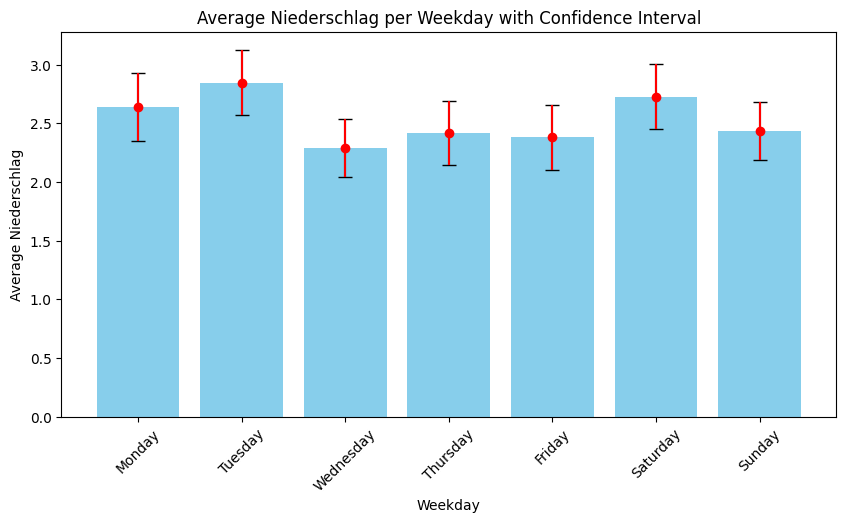

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'

# Read the file and check it out
df_weather = pd.read_csv(url)
df_weather.info()

# Print the columns to confirm the presence of 'Niederschlag'
print(df_weather.columns)

# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Extract weekday from 'Datum' column
df_weather['Weekday'] = df_weather['Datum'].dt.weekday

# Calculate average 'Niederschlag' per weekday if the column exists
if 'Niederschlag' in df_weather.columns:
    avg_niederschlag_per_weekday = df_weather.groupby('Weekday')['Niederschlag'].mean()

    # Sort weekdays from Monday to Sunday
    avg_niederschlag_per_weekday = avg_niederschlag_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

    # Calculate confidence interval
    ci = 1.96 * df_weather.groupby('Weekday')['Niederschlag'].std() / np.sqrt(df_weather.groupby('Weekday')['Niederschlag'].count())

    # Plot bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(avg_niederschlag_per_weekday.index, avg_niederschlag_per_weekday.values, yerr=ci, capsize=5, color='skyblue')
    plt.errorbar(avg_niederschlag_per_weekday.index, avg_niederschlag_per_weekday.values, yerr=ci, fmt='o', color='red')
    plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
    plt.xlabel('Weekday')
    plt.ylabel('Average Niederschlag')
    plt.title('Average Niederschlag per Weekday with Confidence Interval')
    plt.show()
else:
    print("The column 'Niederschlag' does not exist in the dataset.")


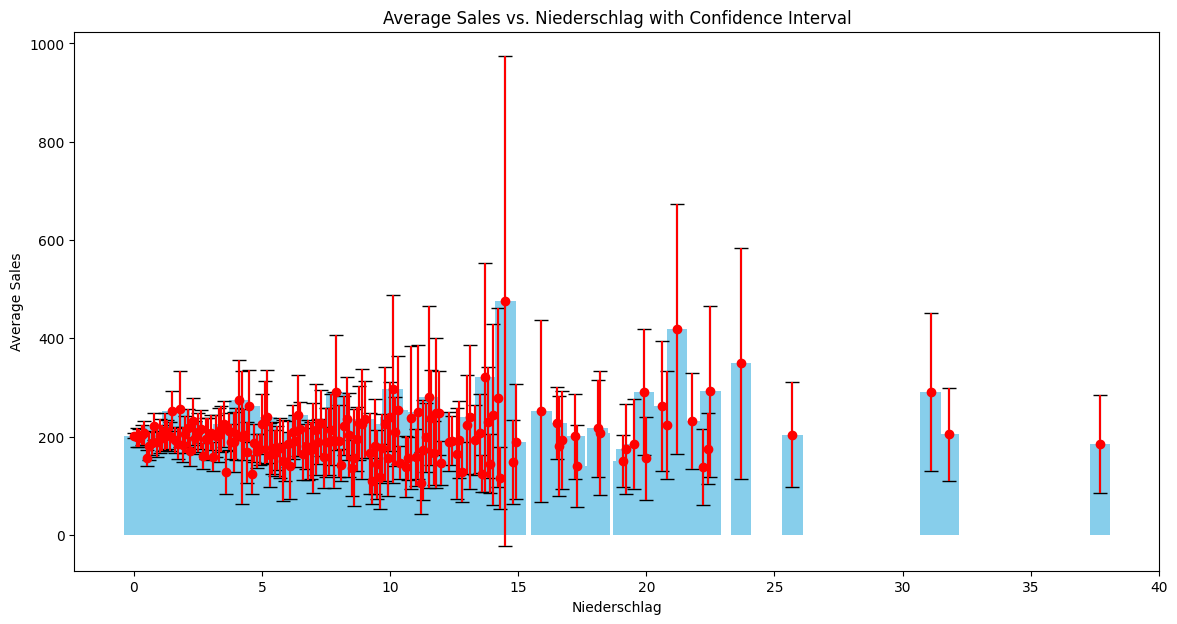

In [28]:
# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Group by 'Niederschlag' and calculate average sales ('Umsatz')
avg_sales_per_niederschlag = df_weather.groupby('Niederschlag')['Umsatz'].mean()

# Calculate confidence intervals
ci = 1.96 * df_weather.groupby('Niederschlag')['Umsatz'].std() / np.sqrt(df_weather.groupby('Niederschlag')['Umsatz'].count())

# Plot bar chart
plt.figure(figsize=(14, 7))
plt.bar(avg_sales_per_niederschlag.index, avg_sales_per_niederschlag.values, yerr=ci, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_niederschlag.index, avg_sales_per_niederschlag.values, yerr=ci, fmt='o', color='red')
plt.xlabel('Niederschlag')
plt.ylabel('Average Sales')
plt.title('Average Sales vs. Niederschlag with Confidence Interval')
plt.show()


### **3.1 - Creation of a bar chart for feature "Summer"**

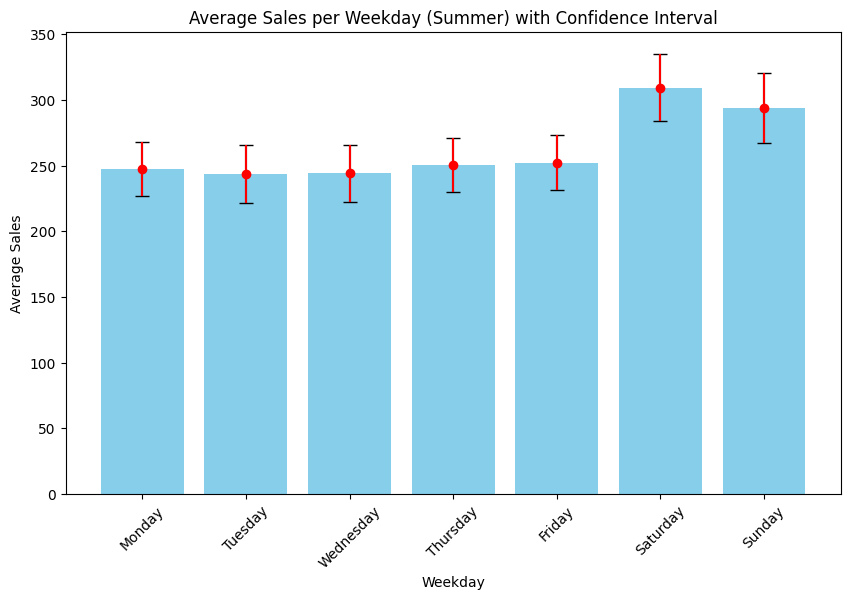

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'
df_weather = pd.read_csv(url)

# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Filter the data for the 'summer' season
df_summer = df_weather[df_weather['season_str'] == 'summer'].copy()

# Extract weekday from 'Datum' column
df_summer.loc[:, 'Weekday'] = df_summer['Datum'].dt.weekday

# Calculate average sales ('Umsatz') per weekday
avg_sales_per_weekday = df_summer.groupby('Weekday')['Umsatz'].mean()

# Calculate confidence intervals for average sales
ci_sales = 1.96 * df_summer.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_summer.groupby('Weekday')['Umsatz'].count())

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])
ci_sales = ci_sales.reindex([0, 1, 2, 3, 4, 5, 6])

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday (Summer) with Confidence Interval')
plt.show()


### **3.2 - Creation of a bar chart for feature "Autumn"**

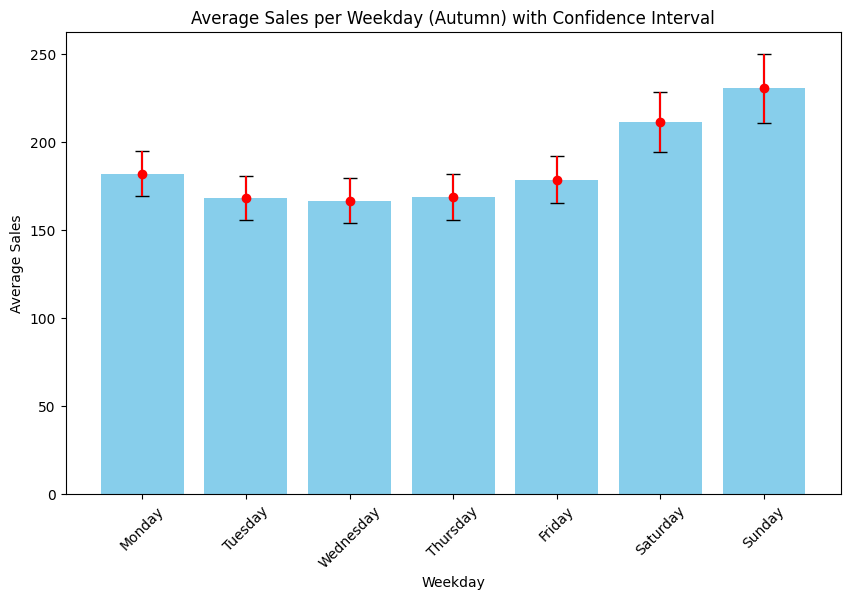

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'
df_weather = pd.read_csv(url)

# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Filter the data for the 'summer' season
df_autumn = df_weather[df_weather['season_str'] == 'autumn'].copy()

# Extract weekday from 'Datum' column
df_autumn.loc[:, 'Weekday'] = df_autumn['Datum'].dt.weekday

# Calculate average sales ('Umsatz') per weekday
avg_sales_per_weekday = df_autumn.groupby('Weekday')['Umsatz'].mean()

# Calculate confidence intervals for average sales
ci_sales = 1.96 * df_autumn.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_autumn.groupby('Weekday')['Umsatz'].count())

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])
ci_sales = ci_sales.reindex([0, 1, 2, 3, 4, 5, 6])

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday (Autumn) with Confidence Interval')
plt.show()


### **3.3 - Creation of a bar chart for feature "Winter"**

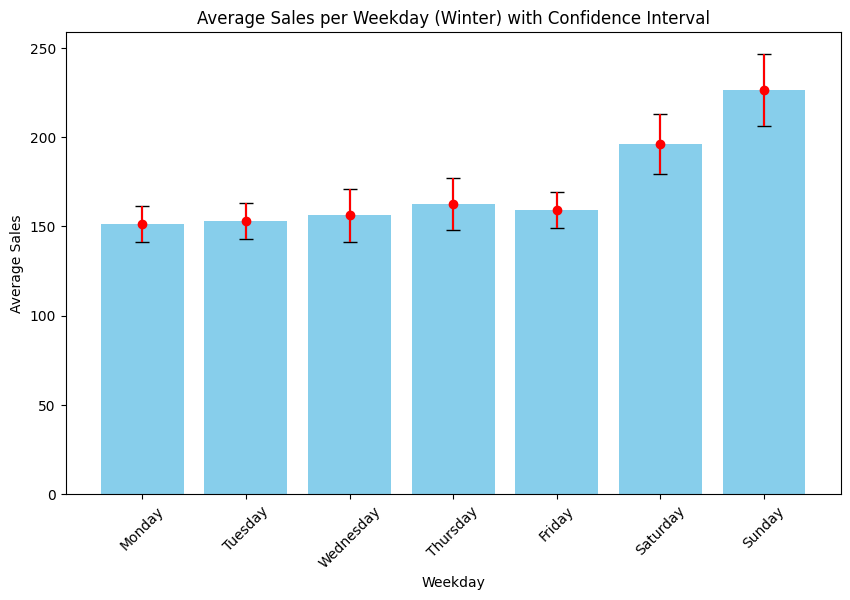

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'
df_weather = pd.read_csv(url)

# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Filter the data for the 'summer' season
df_winter = df_weather[df_weather['season_str'] == 'winter'].copy()

# Extract weekday from 'Datum' column
df_winter.loc[:, 'Weekday'] = df_winter['Datum'].dt.weekday

# Calculate average sales ('Umsatz') per weekday
avg_sales_per_weekday = df_winter.groupby('Weekday')['Umsatz'].mean()

# Calculate confidence intervals for average sales
ci_sales = 1.96 * df_winter.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_winter.groupby('Weekday')['Umsatz'].count())

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])
ci_sales = ci_sales.reindex([0, 1, 2, 3, 4, 5, 6])

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday (Winter) with Confidence Interval')
plt.show()


### **3.4 - Creation of a bar chart for feature "Spring"**

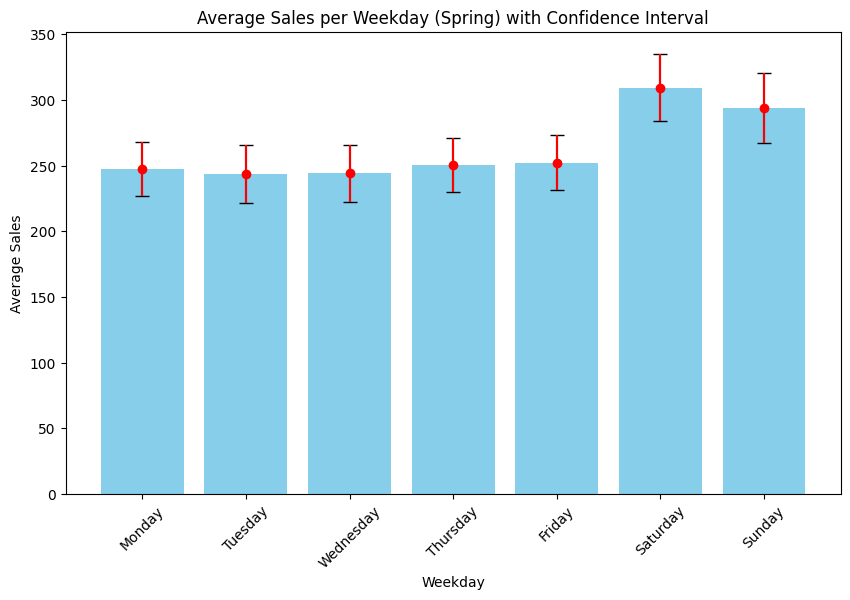

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'
df_weather = pd.read_csv(url)

# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Filter the data for the 'summer' season
df_spring = df_weather[df_weather['season_str'] == 'summer'].copy()

# Extract weekday from 'Datum' column
df_spring.loc[:, 'Weekday'] = df_spring['Datum'].dt.weekday

# Calculate average sales ('Umsatz') per weekday
avg_sales_per_weekday = df_spring.groupby('Weekday')['Umsatz'].mean()

# Calculate confidence intervals for average sales
ci_sales = 1.96 * df_spring.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_spring.groupby('Weekday')['Umsatz'].count())

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])
ci_sales = ci_sales.reindex([0, 1, 2, 3, 4, 5, 6])

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday (Spring) with Confidence Interval')
plt.show()
